In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

In [2]:
def calculate_s(wp_x, wp_y):
    s = np.zeros(wp_x.shape[0])
    for i in range(1, s.shape[0]):
        s[i] = s[i-1] + np.sqrt((wp_x[i] - wp_x[i-1])**2 + (wp_y[i] - wp_y[i-1])**2)
    return s

In [3]:
wp_lurus = np.load('wp_31_with_throttle/31_agus_wp_lurus.npy')
wp_belok = np.load('wp_31_with_throttle/31_agus_wp_belok.npy')
# wp_bb = np.load('wp_31_with_throttle/31_agus_wp_belok_besar.npy')
wp_s = np.load('wp_31_with_throttle/31_agus_wp_S.npy')

In [4]:
wp_1 = np.copy(wp_lurus)
wp_2 = np.copy(wp_belok)
wp_3 = np.copy(wp_s)
# wp_4 = np.copy(wp_bb)

wp_1[:,:2] -= wp_lurus[0,:2]
wp_2[:,:2] -= wp_lurus[0,:2]
wp_3[:,:2] -= wp_lurus[0,:2]
# wp_4[:,:2] -= wp_lurus[0,:2]

s1 = calculate_s(wp_1[:,0], wp_1[:,1])
s2 = calculate_s(wp_2[:,0], wp_2[:,1])
s3 = calculate_s(wp_3[:,0], wp_3[:,1])
# s4 = calculate_s(wp_4[:,0], wp_4[:,1])

print("TOTAL PANJANG LINTASAN (M)")
print('lurus: {}'.format(s1[-1]))
print('belok: {}'.format(s2[-1]))
print('s: {}'.format(s3[-1]))
# print('bb: {}'.format(s4[-1]))

a = np.min(wp_1[:,:2], axis=0)
b = np.min(wp_2[:,:2], axis=0)
c = np.min(wp_3[:,:2], axis=0)
# d = np.min(wp_4[:,:2], axis=0)
# min_val = np.min(np.array([a,b,c,d]), axis=0)
min_val = np.min(np.array([a,b,c]), axis=0)

a = np.max(wp_1[:,:2], axis=0)
b = np.max(wp_2[:,:2], axis=0)
c = np.max(wp_3[:,:2], axis=0)
# d = np.max(wp_4[:,:2], axis=0)
# max_val = np.max(np.array([a,b,c,d]), axis=0)
max_val = np.max(np.array([a,b,c]), axis=0)

center = (max_val + min_val) / 2
scale = max_val - min_val
max_scale = np.max(scale)

lim_min = center - max_scale/1.9
lim_max = center + max_scale/1.9

TOTAL PANJANG LINTASAN (M)
lurus: 28.67319702761947
belok: 31.862786187093896
s: 29.776457205933824


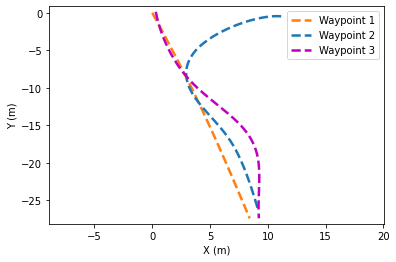

In [5]:
plt.plot(wp_1[:,0], wp_1[:,1], label = 'Waypoint 1', color='tab:orange', linestyle='--', linewidth=2.5)
plt.plot(wp_2[:,0], wp_2[:,1], label = 'Waypoint 2', color='tab:blue', linestyle='--', linewidth=2.5)
plt.plot(wp_3[:,0], wp_3[:,1], label = 'Waypoint 3', color='m', linestyle='--', linewidth=2.5)
# plt.plot(wp_4[:,0], wp_4[:,1], label = 'Waypoint 4', color='black', linestyle='--', linewidth=2.5)
plt.legend()
plt.xlim(lim_min[0], lim_max[0])
plt.ylim(lim_min[1], lim_max[1])
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.savefig('img/Posisi.png', dpi=600, transparent=True)
plt.show()

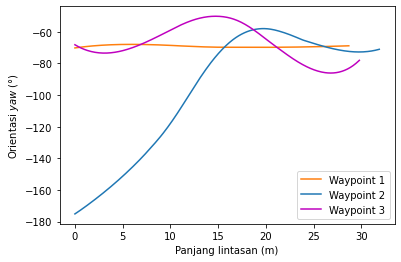

In [6]:
plt.plot(s1, wp_1[:,2]*180/np.pi, label = 'Waypoint 1', color='tab:orange')
plt.plot(s2, wp_2[:,2]*180/np.pi, label = 'Waypoint 2', color='tab:blue')
plt.plot(s3, wp_3[:,2]*180/np.pi, label = 'Waypoint 3', color='m')
# plt.plot(s4, wp_4[:,2]*180/np.pi, label = 'Waypoint 4', color='black')
plt.xlabel('Panjang lintasan (m)')
plt.ylabel(r'Orientasi $yaw$ ($\degree$)')
plt.legend()
plt.savefig('img/Yaw.png', dpi=600, transparent=True)
plt.show()

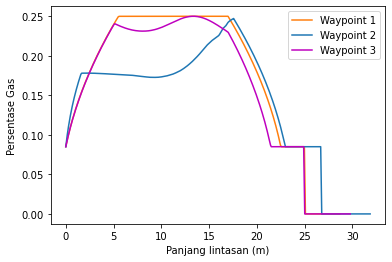

In [7]:
plt.plot(s1, wp_1[:,3], label = 'Waypoint 1', color='tab:orange')
plt.plot(s2, wp_2[:,3], label = 'Waypoint 2', color='tab:blue')
plt.plot(s3, wp_3[:,3], label = 'Waypoint 3', color='m')
# plt.plot(s4, wp_4[:,3], label = 'Waypoint 4', color='black')
plt.xlabel('Panjang lintasan (m)')
plt.ylabel('Persentase Gas')
plt.legend()
plt.savefig('img/Throttle.png', dpi=600, transparent=True)
plt.show()

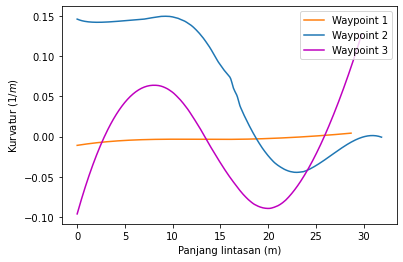

In [8]:
plt.plot(s1, wp_1[:,4], label = 'Waypoint 1', color='tab:orange')
plt.plot(s2, wp_2[:,4], label = 'Waypoint 2', color='tab:blue')
plt.plot(s3, wp_3[:,4], label = 'Waypoint 3', color='m')
# plt.plot(s4, wp_4[:,4], label = 'Waypoint 4', color='black')
plt.xlabel('Panjang lintasan (m)')
plt.ylabel(r'Kurvatur $(1/m)$')
plt.legend()
plt.savefig('img/Kurvatur.png', dpi=600, transparent=True)
plt.show()